In [1]:
#importing necessary packages

%tensorflow_version 2.x


import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


import numpy as np
import glob
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

TensorFlow 2.x selected.


Using TensorFlow backend.


In [2]:
#google drive to load files from
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Loading images. This is NOT-RECOMMENDED way to load images this way.
# G.Drive has some different way of loading images (idk) (Folders are NOT formatted by name). 
# Normally, you can simply load it with below single command in the comment:
  #    images = [cv2.imread(file) for file in glob.glob('E:/datasets/jaffedbase/*/*.jpg')]

images = [cv2.imread(file) for file in glob.glob('/content/drive/My Drive/jaffedbase/ANGRY/*.jpg')]
images += [cv2.imread(file) for file in glob.glob('/content/drive/My Drive/jaffedbase/DISGUST/*.jpg')]
images += [cv2.imread(file) for file in glob.glob('/content/drive/My Drive/jaffedbase/FEAR/*.jpg')]
images += [cv2.imread(file) for file in glob.glob('/content/drive/My Drive/jaffedbase/HAPPY/*.jpg')]
images += [cv2.imread(file) for file in glob.glob('/content/drive/My Drive/jaffedbase/NEUTRAL/*.jpg')]
images += [cv2.imread(file) for file in glob.glob('/content/drive/My Drive/jaffedbase/SAD/*.jpg')]
images += [cv2.imread(file) for file in glob.glob('/content/drive/My Drive/jaffedbase/SURPRISE/*.jpg')]

images=np.array(images)

In [4]:
# Cropping images
# FER deals with the facial regions and features like hair etc dose not play any role
'''
x=[]
for image in images: 
  x.append(image[55:230, 43:218])

x=np.array(x)
images=x
print(images.shape)
'''

'\nx=[]\nfor image in images: \n  x.append(image[55:230, 43:218])\n\nx=np.array(x)\nimages=x\nprint(images.shape)\n'

In [5]:
#counting # of images
def numOfImages(val):
    return len(list(glob.iglob("/content/drive/My Drive/jaffedbase/" +val + "/*.jpg", recursive=True)))
    

print('# of images : angry: {} : disgust : {} : fear {} : happy : {} : neutral : {} : sad : {} : surprise : {}'.
      format(numOfImages('ANGRY'), numOfImages('DISGUST'), numOfImages('FEAR'),
             numOfImages('HAPPY'), numOfImages('NEUTRAL'), numOfImages('SAD'), numOfImages('SAD')))


# of images : angry: 30 : disgust : 29 : fear 32 : happy : 31 : neutral : 30 : sad : 31 : surprise : 31


In [6]:
# assigning labels
labels = np.ones((len(images)),dtype='int64')
labels[0:30]=0 
labels[30:59]=1 
labels[59:91]=2 
labels[91:122]=3
labels[122:152]=4 
labels[152:183]=5 
labels[183:]=6 

print(labels)

#Converting labels into categorical
labels = np_utils.to_categorical(labels)
print(labels.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
(213, 7)


<function matplotlib.pyplot.show>

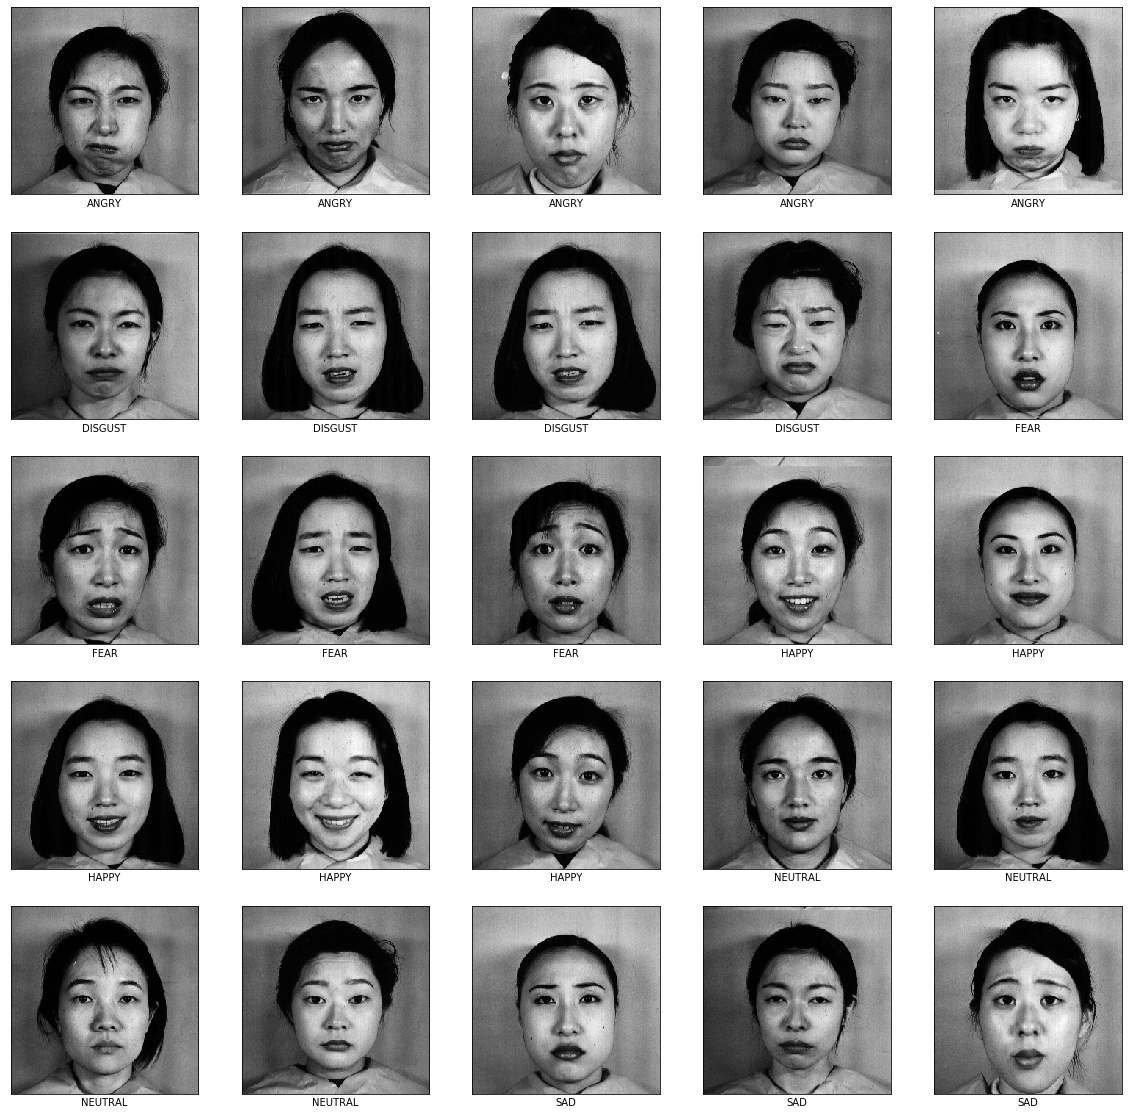

In [7]:
class_names = ['ANGRY','DISGUST','FEAR','HAPPY','NEUTRAL','SAD','SURPRISE']

plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(images[i*7], cmap='gray')
    plt.xlabel(class_names[np.argmax(labels[i*7])])
plt.show

In [0]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=2)

In [0]:
num_features= 64
batch_size = 64
epochs = 60

In [10]:
#defining our model
model = keras.Sequential([
                          keras.layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Conv2D(128, kernel_size=(5, 5), activation='relu'),
                          keras.layers.MaxPooling2D(pool_size=(2, 2)),
                          keras.layers.Dropout(0.5),

                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dropout(0.6),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(7, activation='softmax')


])

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Callbacks
earlyStopping = EarlyStopping(monitor='val_loss', patience=10)
mcp_save = ModelCheckpoint('/content/drive/My Drive/', monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.001)

In [13]:
# I have ran this model several times. 
# Thatswhy the validation accuracy is best on the first epoch.
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=300, verbose=1, callbacks=[earlyStopping, mcp_save, reduce_lr_loss], validation_data=(x_test, y_test), shuffle=True)

Train on 181 samples, validate on 32 samples
Epoch 1/300
181/181 [==============================] - 3s 16ms/sample - loss: 54.8449 - accuracy: 0.1050 - val_loss: 4.9236 - val_accuracy: 0.2500
Epoch 2/300
181/181 [==============================] - 0s 546us/sample - loss: 7.2058 - accuracy: 0.1602 - val_loss: 2.1845 - val_accuracy: 0.1562
Epoch 3/300
181/181 [==============================] - 0s 540us/sample - loss: 2.3156 - accuracy: 0.1602 - val_loss: 1.9530 - val_accuracy: 0.0938
Epoch 4/300
181/181 [==============================] - 0s 520us/sample - loss: 2.0462 - accuracy: 0.1381 - val_loss: 1.9465 - val_accuracy: 0.0938
Epoch 5/300
181/181 [==============================] - 0s 512us/sample - loss: 2.0550 - accuracy: 0.1713 - val_loss: 1.8980 - val_accuracy: 0.1875
Epoch 6/300
181/181 [==============================] - 0s 509us/sample - loss: 1.9226 - accuracy: 0.2210 - val_loss: 1.9226 - val_accuracy: 0.1875
Epoch 7/300
181/181 [==============================] - 0s 515us/sample - 

32/32 - 0s - loss: 0.5012 - accuracy: 0.7500


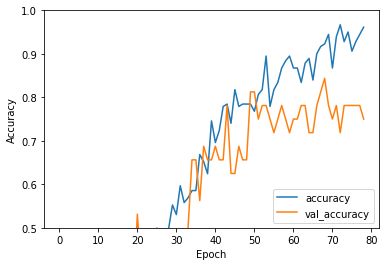

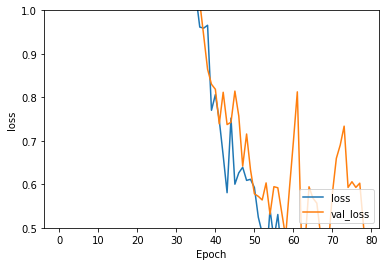

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.figure()


plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.figure()

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Acheiving good accuracy on training set is extremely easy with only 213 images.
Validation Accuracy acheived above is above **80%** and validation loss is also low. It is actually good but with every epoch we are witnessing alot of fluctuations and it is not a good omen.

Let us try to predict and see for ourselves.

In [0]:
predictions = model.predict(x_test)

<function matplotlib.pyplot.show>

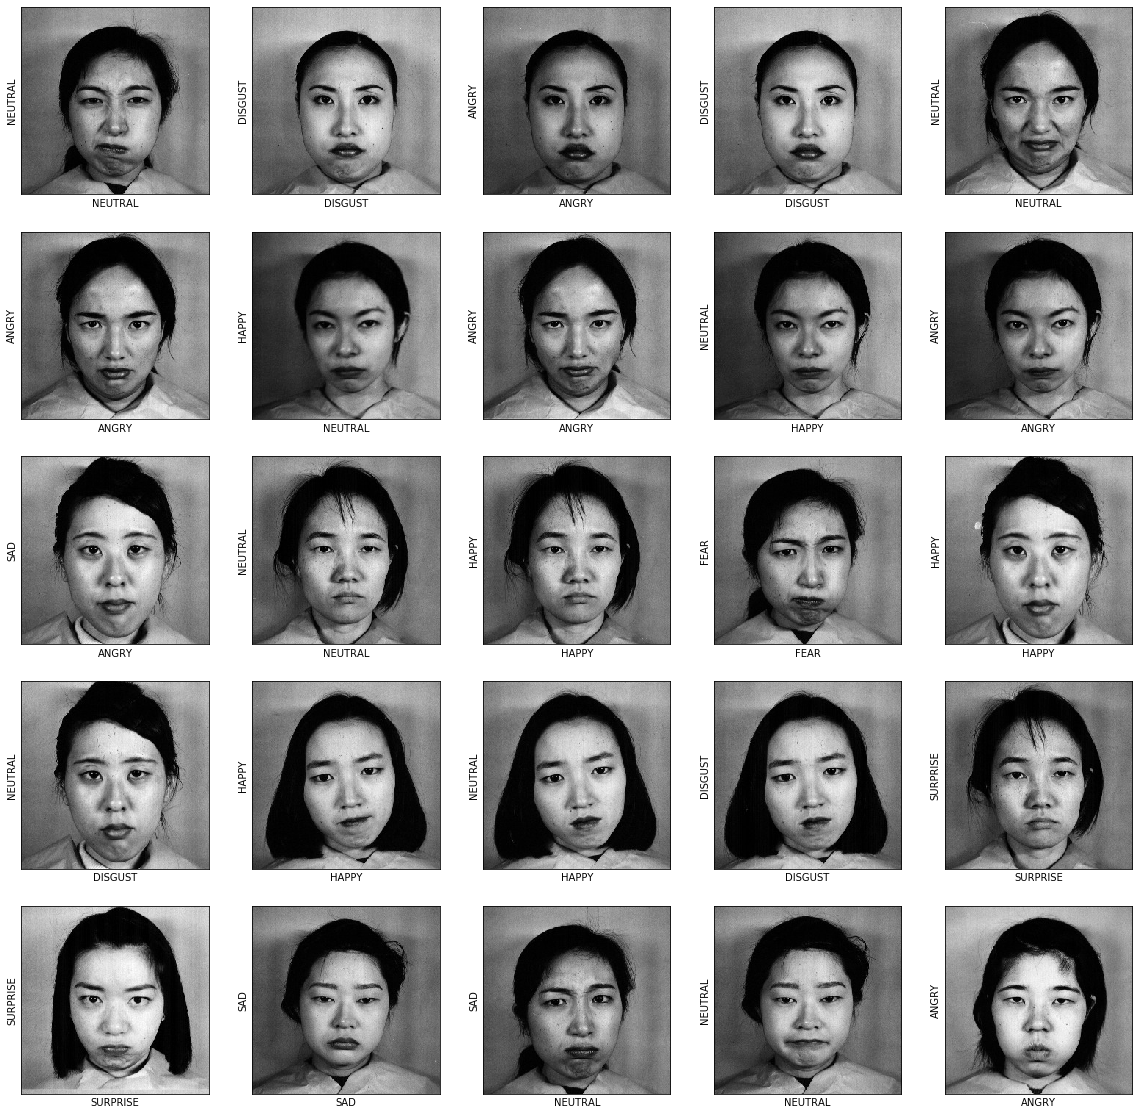

In [17]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap='gray')
    plt.xlabel(class_names[np.argmax(predictions[i])])
    plt.ylabel(class_names[np.argmax(y_test[i])])
plt.show

Conclusion: As expected and recommended by many pioneers (including andrew ng), small datasets need to be processed with Machine learning. Deep learning is a data greedy approach. 
* Any bigger NN resulted in over fitting.
* Reasong for not using svm or knn is my intention of training future networks using DL and CV. This data is merged with other and one would be able to find the subtle differences.

Transfer learning is no approach to be used for this dataset. But still i will try to play with it and see the impact. 

In [0]:
local_weights_file = "/content/drive/My Drive/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_trained_model = InceptionV3(input_shape = images[0].shape, 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [28]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 9, 9, 768)


In [0]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.5)(x)     

x = tf.keras.layers.Dense(124, activation='relu')(x)

# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense  (7, activation='softmax')(x)           

model = tf.keras.models.Model( pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])



In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 10,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   #shear_range = 0.2,
                                   #vertical_flip=True,
                                   #zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale=1/255.)

In [0]:
model.compile(optimizer = 'adam',
              #tf.keras.optimizers.Adadelta(lr=0.01, rho=0.95, epsilon=1e-06), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [32]:
# run model
hist = model.fit_generator( train_datagen.flow(x_train, y_train, batch_size=128), epochs=100,
                 shuffle=True,
                 steps_per_epoch=len(x_train) // 128,
                 
                 validation_data=test_datagen.flow(x_test, y_test),
                 verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1 steps, validate for 1 steps
Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 2.0571 - acc: 0.1484 - val_loss: 3.1817 - val_acc: 0.0938
Epoch 2/100
1/1 [==============================] - 1s 715ms/step - loss: 3.2427 - acc: 0.1509 - val_loss: 4.8863 - val_acc: 0.0938
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 4.7586 - acc: 0.1328 - val_loss: 2.4078 - val_acc: 0.1562
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 3.1555 - acc: 0.2422 - val_loss: 2.5477 - val_acc: 0.1875
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 3.1829 - acc: 0.2969 - val_loss: 2.0643 - val_acc: 0.3125
Epoch 6/100
1/1 [==============================] - 1s 692ms/step - loss: 3.1555 - acc: 0.1698 - val_loss: 2.3829 - val_acc: 0.0938
Epoch 7/100
1/1 [==============================] - 1s 1s/ste

As suggested, using transfer learning  is not feasible for a smal dataset.